# Automatic Curve Fitting

When you manually found the fit parameters to a model, you increased and decreased the fit parameters and examined the sum of the square of the residuals. When this number was minimized, you were confident that you found the best-fit values of the parameters.

Python has a function `curve_fit()` from the `scipy.optimize` package that will do this for you.

In [52]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe
from scipy.optimize import curve_fit #used to find the fit parameters

## Example - An emperical model for HPU COVID data

Fit an exponential model to the COVID data using

$$y = Ae^{rx}$$

- Print the curve fit parameters.
- Predict the number of cases on Friday.

In this example, the residuals are plotted below the graph of the model and data.

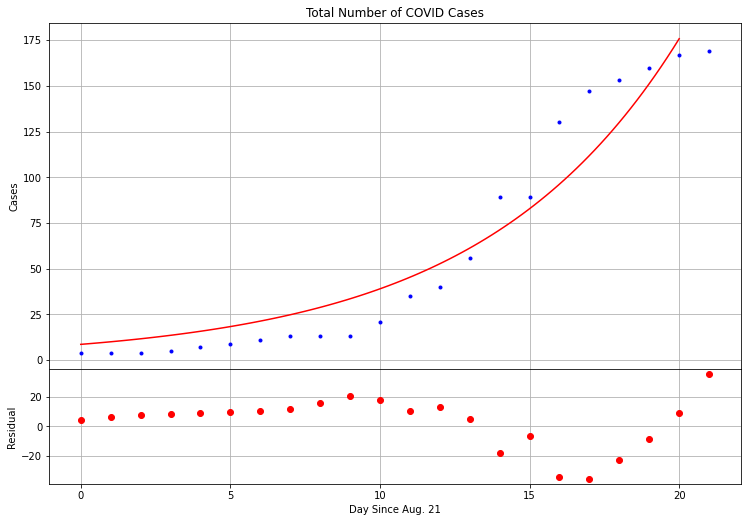

The sum of the squares of the residuals = 6.552613e+03
The curve fit parameters are:  8.666116954823663 0.15050292930203163
Projection for Friday: 204 


In [59]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
18	153
19	160
20	167
21	169
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,A,r: A*np.exp(r*x)

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(0,20,100)
ymodel = model(xmodel,*params)

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Total Number of COVID Cases")
plt.ylabel("Cases")

# plot residuals
frame1.set_xticklabels([]) # remove x-tic labels for the first frame
residuals = model(xdata,*params) - ydata
frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.plot(xdata,residuals,'or')
plt.ylabel("Residual")
plt.xlabel("Day Since Aug. 21")
plt.grid()

plt.show()

#results
print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
print("The curve fit parameters are: ",*params)

#prediction
print("Projection for Friday: {:.0f} ".format(model(21,*params)))

Here is the same code without the residuals plot.

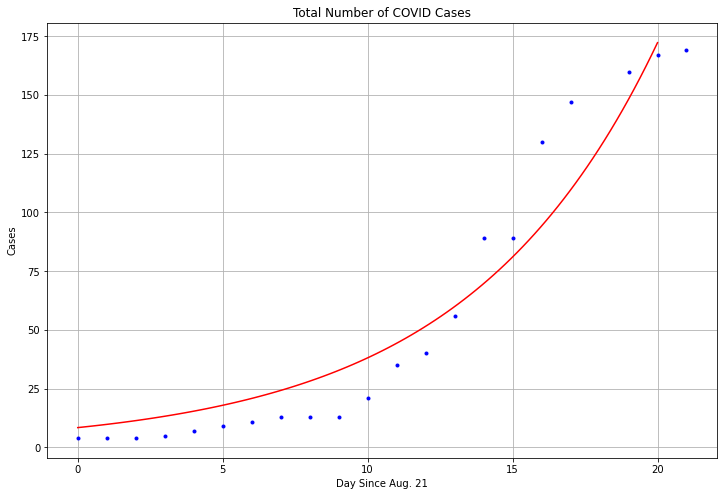

The sum of the squares of the residuals = 5.967308e+03
The curve fit parameters are:  8.43996232928684 0.1508044065709369
Projection for Friday: 200 


In [60]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
19	160
20	167
21	169
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,A,r: A*np.exp(r*x)

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(0,20,100)
ymodel = model(xmodel,*params)

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Total Number of COVID Cases")
plt.ylabel("Cases")
plt.xlabel("Day Since Aug. 21")
plt.show()

#results
residuals = model(xdata,*params) - ydata
print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
print("The curve fit parameters are: ",*params)

#prediction
print("Projection for Friday: {:.0f} ".format(model(21,*params)))

## What should you do if  `curve_fit` fails?

Glass transmits visible light very well. But it blocks most infrared and ultraviolet light. Data for the transmission of light vs wavelength for a particular glass is in the file [transmission-glass.txt](transmission-glass.txt). ([source](http://nvlpubs.nist.gov/nistpubs/jres/38/jresv38n6p601_A1b.pdf))

Fit a Gaussian model to the data using:

$$y=ae^{\left(-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right)}$$

and find the best-fit parameters.

/Users/atitus/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


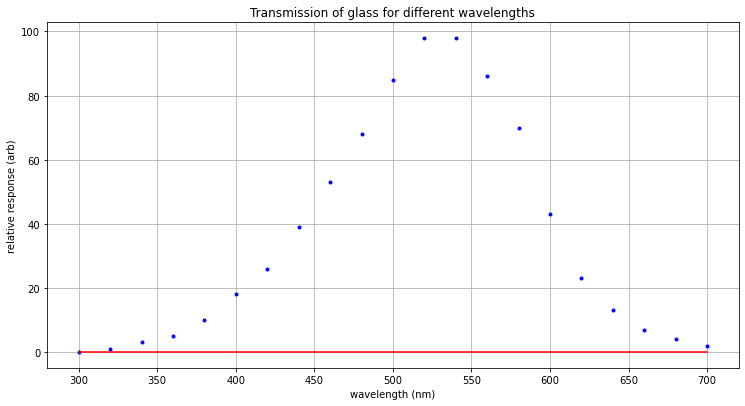

The sum of the squares of the residuals = 5.143400e+04
The curve fit parameters are: A=1.000, r=1.000


In [49]:
#define data
#The columns are: Wavelength (nm)	Relative Response (arb)
data = StringIO("""x	y
300	0
320	1
340	3
360	5
380	10
400	18
420	26
440	39
460	53
480	68
500	85
520	98
540	98
560	86
580	70
600	43
620	23
640	13
660	7
680	4
700	2
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,a,b,c: a*np.exp(-1/2*((x-b)/c)**2)

# Find best fit parameters
guess=[1,1,1] # this is the initial guess for the fit parameters; you need a 1 for each parameter
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(300,700,100)
ymodel = model(xmodel,*params)

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Transmission of glass for different wavelengths")
plt.xlabel("wavelength (nm)")
plt.ylabel("relative response (arb)")
plt.show()

#results
residuals = model(xdata,*params) - ydata
print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
print("The curve fit parameters are: A={:.3f}, r={:.3f}".format(*params))

### Change the initial guesses

The `curve_fit()` function adjusts the fit parameters until it minimizes the sum of the squares of the residuals. It starts with the initial guesses for the parameters listed in the line:

```python
guess=[1,1,1]
```

Note that there is a value for each parameter. So in this case, the initial guesses are $a=1$, $b=1$, and $c=1$. But the `curve_fit()` function fails if the initial guesses are far from the best-fit values. When this happens, change the initial guesses. You will have to make them much larger or smaller, and understanding how the parameters affects the function is important for determining a reasonable guess.

In this example, the parameter `a` is the peak of the gaussian which is close to 100. The parameter `b` is the mean which is around 530. And `c` is related to the width of the peak (or variance) which is around 100. Try using these initial values. So, we will try

```python
guess=[100,530,100]
```

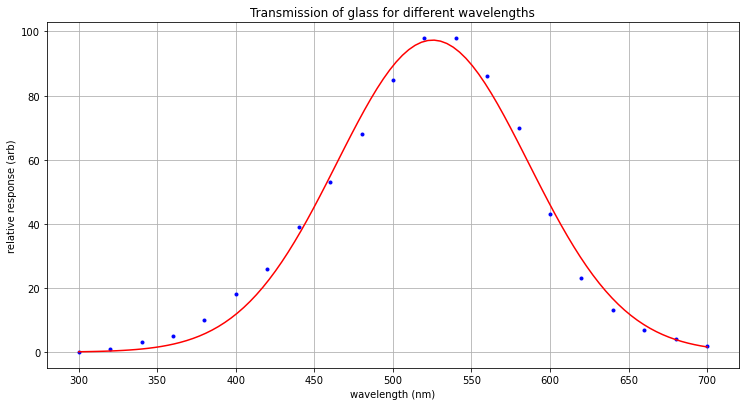

The sum of the squares of the residuals = 2.562615e+02
The curve fit parameters are:  97.318192466252 525.314673947277 60.97495072538861


In [50]:
#define data
#The columns are: Wavelength (nm)	Relative Response (arb)
data = StringIO("""x	y
300	0
320	1
340	3
360	5
380	10
400	18
420	26
440	39
460	53
480	68
500	85
520	98
540	98
560	86
580	70
600	43
620	23
640	13
660	7
680	4
700	2
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,a,b,c: a*np.exp(-1/2*((x-b)/c)**2)

# Find best fit parameters
guess=[100,530,100] # this is the initial guess for the fit parameters; you need a 1 for each parameter
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(300,700,100)
ymodel = model(xmodel,*params)

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Transmission of glass for different wavelengths")
plt.xlabel("wavelength (nm)")
plt.ylabel("relative response (arb)")
plt.show()

#results
residuals = model(xdata,*params) - ydata
print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
print("The curve fit parameters are: ",*params)

## Exercise

Kepler found a relationship between the period of a planet's orbit (in Earth years) and the semi-major axis (kinda like the radius, for a circular orbit) of the planet's orbit (in astronomical units, AU, which is the semi-major axis of Earth's orbit). Data for the 8 planets is in the file [planets.txt](https://github.com/atitus/math-modeling/raw/master/unit-02/02-05-auto-curve-fitting/planets.txt).

1. Plot the period vs.semimajor axis of the planet's orbit.
2. Fit a power law: 
  $$y = Ax^n$$
  and find the best-fit parameters.
3. There are [five dwarf planets](https://en.wikipedia.org/wiki/Dwarf_planet). 
  1. Use your model to **predict** the period of each of the dwarf planets' orbits using the semimajor axis of their orbits.
  2. Compare your prediction to the actual period of each dwarf planet.

# Example Test Question

## Global Temperature Anomaly

Are you ready to use what you've learned so far?  Up to now, you have learned how to:

- write markdown to render text in a notebook.
- write Python code, with the numpy package for math functions, to calculate a quantity and print a result.
- plot the data on a graph.
- plot a mathematical function.
- fit a curve to data and find the best-fit parameters of the curve.

## Problem

To acertain long-scale changes in Earth's average temperature over time, scientists plot the **global surface temperature anomaly**. In this joint press release by NASA and NOAA on Jan. 18, 2018, [Long-Term Warming Trend Continued in 2017](https://www.giss.nasa.gov/research/news/20180118/), scientists "concluded that 2017 was the third-warmest year in their record." The [data and methodology](https://data.giss.nasa.gov/gistemp/) are provided to the public.

[According to NOAA](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php), "the term temperature anomaly means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value."

The reference for this anomaly data is the average temperature during the period 1951 - 1980. Sometimes the 20th century average global surface temperature is used. Then in this case, a positive anomaly is warmer than the 20th century average. A negative anomaly is cooler than the 20th century average. NOAA points out that the reference period does not "change the shape of the time series or affect the trends within it."

### Part I

(1) Copy data from the file [global-surface-temperature.txt](https://github.com/atitus/math-modeling/raw/master/unit-02/02-05-auto-curve-fitting/global-surface-temperature.txt) and plot the global surface temperature anomaly as a function of year. Use a line graph (i.e. connect the data points).

A simple empirical model will certainly not fit the data, in terms of the annual ups and downs. However we can try different mathematical functions to see if they at least have similar behavior overall.

(2) Fit a linear function of the form

$$T = a_0 + a_1y$$

where $T$ is the global surface temperature anomaly and $y$ is the year. Print the best-fit parameters: $a_0$ and $a_1$, and plot the best fit curve with the data. You should appropriately title the graph, label the axes, and indicate what is plotted with a legend.

(3) Based on the linear function, how much is the global surface temperature anomaly increasing per year? Why is this called an *average* increase in temperature?



### Part II

Using the same data set

(1) Fit a quadratic function of the form

$$T = a_0 + a_1y + a_2y^2$$

Print the best-fit parameters and plot the data and best-fit curve on the same graph.

(2) Why is the quadratic function a better fit than the linear function?

(3) Why is it much more worrisome for the quadratic function to fit the data (compared to the linear function)?





### Part III

(1) What will be the temperature anomaly in year 2050? Answer this question two different ways:

   1. Use your best-fit function and substitute the year 2050.
   2. Plot the model through the year 2050 and examine the graph at year 2050.
   
(2) Suppose you are a politician and you are determining policy based on projections using this quadratic empirical model. Discuss the ethics, potentially both right and wrong, about basing policy on this emperical model.

(3) Use the linear model to predict the temperature anomaly in year 2050. Compare it to the quadratic model.

(4) In what way(s) is an emperical model limited?

(5) Is there any debate that *global warming* is occurring?

(6) Is it possible that some parts of Earth were actually cooler than the average? Check out [this map of temperature anomaly in 2017](https://data.giss.nasa.gov/gistemp/maps/).